In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

0,0.jpg,83110

83110


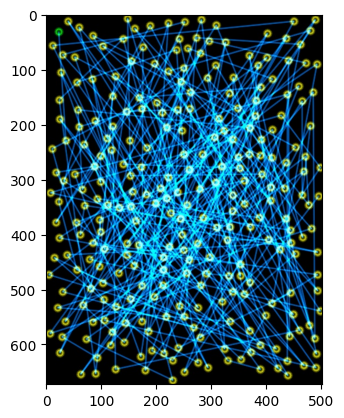

In [2]:
pic_num = 0

image = mpimg.imread(f'tsp-cv/{pic_num}.jpg')

with open('tsp-cv/train.csv') as f:
    for i, line in enumerate(f):
        if i == pic_num+1:
            print(line)
            true_lenght = int(line.split(',')[2])
            break

print(true_lenght)
plt.imshow(image)

In [3]:
import circle_detection_functions
import line_detection_functions

from functools import partial

In [4]:
circle_detecter_function = partial(circle_detection_functions.get_yellow_circles_cv2)
line_detecter_function = partial(line_detection_functions.get_next_pos)

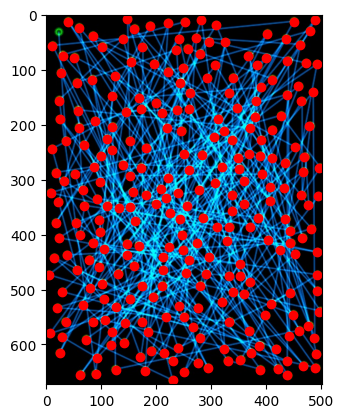

In [5]:
#detect the circles

detected_positions = list(circle_detecter_function(image))

plt.imshow(image)
for p in detected_positions:
    plt.plot(p[0], p[1], 'ro')

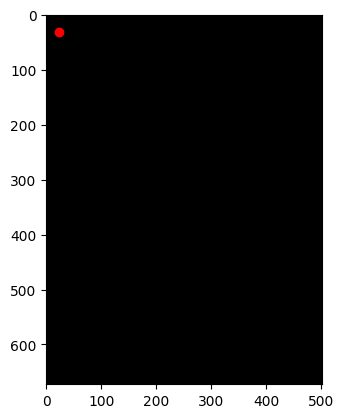

In [6]:
#detect the green circle
image_cp = image.copy()
image_cp = image_cp.astype('int32')
green_matrix = image_cp[:,:,1] - image_cp[:,:,0] - image_cp[:,:,2] - 100
green_matrix = green_matrix.clip(min=0)

all_green_positions = np.nonzero(green_matrix)

average_green_position = np.mean(all_green_positions, axis=1)

start_pos = (int(average_green_position[1]), int(average_green_position[0]))

plt.imshow(green_matrix, cmap='gray')
plt.plot(start_pos[0],start_pos[1], 'ro')


In [7]:
#detect the lines
remaining_positions = list(detected_positions.copy())

current_pos = start_pos

sorted_positions = [current_pos]
while len(remaining_positions) > 0:
    next_pos = line_detecter_function(image, current_pos, remaining_positions)
    print("detected next_pos: ",remaining_positions[next_pos])
    current_pos = remaining_positions.pop(next_pos)
    sorted_positions.append(current_pos)

detected next_pos:  [ 35 229]
detected next_pos:  [159 457]
detected next_pos:  [244 123]
detected next_pos:  [219 206]
detected next_pos:  [153 350]
detected next_pos:  [212 465]
detected next_pos:  [152 518]
detected next_pos:  [251 550]
detected next_pos:  [284 255]
detected next_pos:  [421 644]
detected next_pos:  [ 54 378]
detected next_pos:  [369 254]
detected next_pos:  [181 328]
detected next_pos:  [132 351]
detected next_pos:  [211 493]
detected next_pos:  [255 470]
detected next_pos:  [217 550]
detected next_pos:  [370 206]
detected next_pos:  [349 260]
detected next_pos:  [407 339]
detected next_pos:  [443 393]
detected next_pos:  [435 371]
detected next_pos:  [444 416]
detected next_pos:  [407 314]
detected next_pos:  [390 228]
detected next_pos:  [381 157]
detected next_pos:  [285 370]
detected next_pos:  [249 428]
detected next_pos:  [ 67 529]
detected next_pos:  [274 416]
detected next_pos:  [260 446]
detected next_pos:  [213 441]
detected next_pos:  [174 494]
detected n

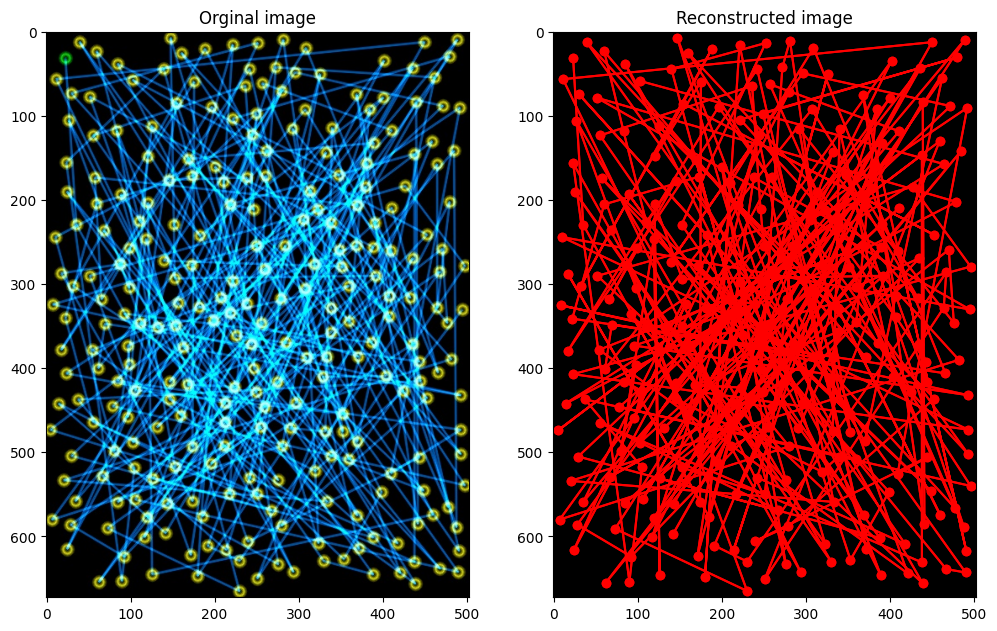

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')

In [9]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(sorted_positions)):
    lenght += np.linalg.norm(np.array(sorted_positions[i]) - np.array(sorted_positions[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  83110
Lenght of the path:  81947.41543991528


In [7]:
all_positions = detected_positions.copy()
all_positions.insert(0, start_pos)

In [8]:
all_positions = all_positions.copy()
#all_positions.insert(0,start_pos)

matr = line_detection_functions.get_connection_matrix(image,all_positions)

print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matr]))

inf	0.4157181571815718	0.33798326026305303	0.37934724451578383	0.4887459807073955	0.41531581889323643	0.49587231700605394	0.3711681855840928	0.45182362547632005	0.32569558101472995	0.4208860759493671	0.33813364055299544	0.39533949377259947	0.3158813263525305	0.4327002477291495	0.3687985654512851	0.36896551724137927	0.3305033353547605	0.5382452193475815	0.47274954072259645	0.41683694319574993	0.4374633000587199	0.7448863636363636	0.381492797904845	0.4035294117647059	0.3060437205315045	0.36979490366687384	0.31283905967450276	0.32834507042253525	0.44594594594594594	0.39619274241522906	0.47641791044776116	0.3996569468267581	0.33375634517766495	0.7017964071856287	0.4238178633975481	0.8698547215496368	0.4742647058823529	0.3973717146433041	0.3219241443108233	0.39692307692307693	0.34360655737704915	0.3928571428571429	0.37777777777777777	0.5204531151667715	0.3415578132559265	0.39366515837104077	0.6259445843828715	0.4767367750159337	0.3419267299864315	0.34558823529411764	0.36777251184834125	0.34

In [14]:
simple_path_order, score = line_detection_functions.get_simple_best_path(matr)
print(score,simple_path_order)

374.891127130455 [0, 267, 265, 266, 264, 261, 258, 259, 257, 254, 262, 263, 248, 255, 250, 253, 256, 232, 163, 77, 139, 95, 53, 10, 1, 9, 5, 2, 11, 7, 4, 6, 3, 22, 143, 89, 118, 78, 246, 178, 36, 159, 55, 67, 107, 93, 135, 34, 47, 8, 18, 19, 29, 24, 30, 12, 35, 51, 20, 68, 108, 103, 113, 94, 130, 42, 52, 65, 40, 14, 25, 32, 140, 112, 216, 219, 209, 234, 247, 195, 252, 260, 239, 224, 241, 237, 251, 226, 197, 154, 211, 227, 196, 240, 220, 238, 213, 223, 194, 172, 204, 183, 88, 110, 104, 152, 146, 137, 158, 245, 249, 231, 225, 244, 233, 230, 168, 200, 190, 214, 184, 236, 218, 222, 180, 210, 171, 160, 39, 13, 15, 16, 17, 26, 38, 27, 21, 23, 33, 43, 28, 60, 54, 71, 41, 31, 58, 166, 120, 83, 181, 117, 129, 61, 73, 56, 84, 37, 44, 85, 81, 62, 111, 201, 242, 243, 228, 177, 145, 167, 202, 127, 156, 208, 179, 182, 193, 235, 203, 215, 207, 187, 217, 176, 205, 221, 186, 192, 131, 206, 128, 69, 102, 48, 98, 132, 212, 164, 106, 59, 115, 116, 123, 64, 86, 97, 45, 75, 74, 49, 66, 121, 148, 76, 57, 46,

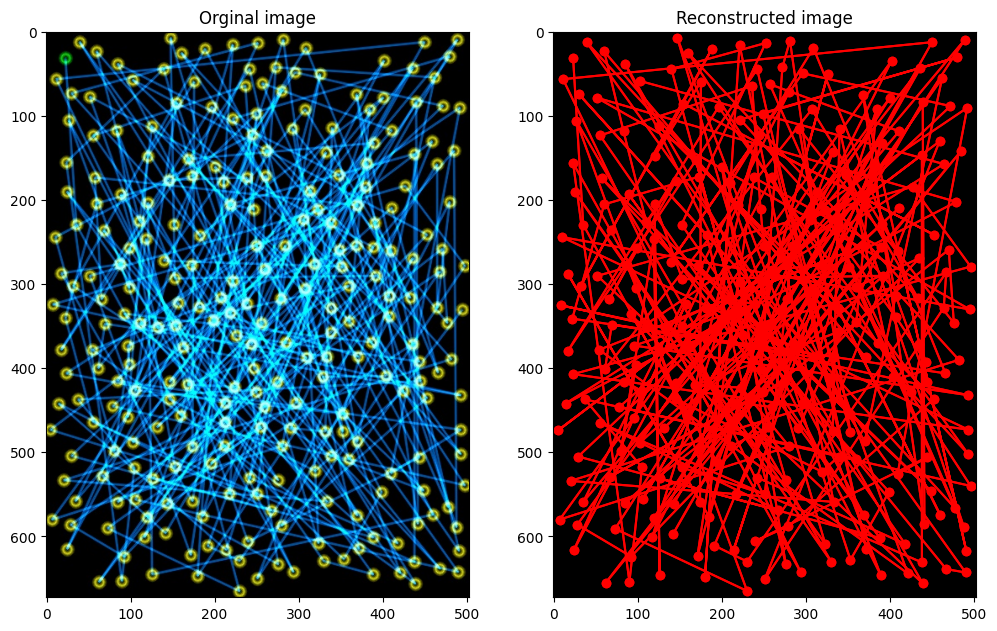

In [10]:
simple_path = [all_positions[i] for i in simple_path_order]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in simple_path], [x[1] for x in simple_path], 'ro-')
axs[1].plot([x[0] for x in simple_path], [x[1] for x in simple_path], 'ro-')

In [ ]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(simple_path)):
    lenght += np.linalg.norm(np.array(simple_path[i]) - np.array(simple_path[i-1]))

print("Lenght of the path: ", lenght)

In [14]:
def return_paths(connection_matrix, max_value, current_path, current_score):
    if not current_path:  #check if current_path is empty
        return []
    if len(current_path) == connection_matrix.shape[0]:
        return current_path
    #print(len(current_path),current_path)
    paths = []
    for i in range(len(connection_matrix)):
        if i not in current_path:
            new_score = current_score + connection_matrix[current_path[-1]][i]
            if new_score <= max_value:
                new_path = current_path.copy()
                new_path.append(i)
                paths.extend(return_paths(connection_matrix, max_value, new_path, new_score))
    return paths
    

def get_best_path(connection_matrix: np.ndarray) -> tuple[list, float]:
    simple_score = 0.01
    paths = []
    while not paths:
        paths = return_paths(connection_matrix, simple_score, [0], 0)
        simple_score = simple_score * 1.1
        print(simple_score)
    return paths

In [10]:
matr = line_detection_functions.get_connection_matrix(image,all_positions,lambda x: 1-x)

#(x/(x-1.01))**2
#also try tan()
#aslo scale the columns separately

In [11]:
backup = matr.copy()

In [21]:
matr = backup.copy()

In [15]:
matr = backup.copy()
for row in range(matr.shape[0]):
    part = matr[row]
    idx = np.argpartition(part, 4)
    #print( part[idx[0]], part[idx[1]], part[idx[2]], part[idx[3]])
    #part = part - min(part[idx[0:3]])
    
    mean = np.mean(part[idx[0:3]])
    part = part / (mean+0.0001)
    matr[row] = part


In [16]:
print('\n'.join(['\t'.join([f"{cell: 0.2f}" for cell in row]) for row in matr]))

 inf	 4.50	 3.66	 4.10	 5.29	 4.49	 5.37	 4.02	 4.89	 3.52	 4.55	 3.66	 4.28	 3.42	 4.68	 3.99	 3.99	 3.58	 5.82	 5.12	 4.51	 4.73	 8.06	 4.13	 4.37	 3.31	 4.00	 3.38	 3.55	 4.83	 4.29	 5.15	 4.32	 3.61	 7.59	 4.59	 9.41	 5.13	 4.30	 3.48	 4.29	 3.72	 4.25	 4.09	 5.63	 3.70	 4.26	 6.77	 5.16	 3.70	 3.74	 3.98	 3.73	 4.22	 3.71	 8.51	 4.49	 3.69	 4.91	 3.70	 3.93	 5.11	 5.06	 3.89	 4.38	 4.07	 3.23	 7.10	 3.61	 5.99	 4.97	 3.38	 3.33	 4.95	 4.05	 4.04	 4.32	 3.34	 9.38	 3.72	 3.78	 5.05	 3.88	 4.11	 4.95	 5.10	 4.10	 2.27	 6.43	 9.15	 3.80	 3.66	 4.84	 5.85	 2.85	 3.83	 2.24	 3.67	 5.07	 3.97	 4.27	 3.45	 5.41	 2.83	 5.55	 4.40	 4.15	 7.68	 3.55	 4.29	 6.30	 5.54	 3.20	 3.12	 4.58	 4.01	 3.90	 5.64	 8.56	 4.30	 5.66	 3.05	 4.03	 3.00	 4.79	 4.86	 3.99	 4.83	 4.55	 6.03	 3.51	 4.66	 5.31	 3.21	 2.96	 7.73	 3.35	 5.43	 4.82	 3.97	 3.38	 3.49	 4.57	 9.21	 4.88	 5.21	 6.18	 4.77	 3.30	 4.85	 3.49	 4.17	 6.08	 3.60	 5.88	 5.37	 5.16	 3.57	 6.36	 8.76	 4.41	 4.84	 3.73	 5.02	 5.82	 3.77	 6.27

In [17]:
#trying with travveling salesman
from python_tsp.exact import solve_tsp_dynamic_programming
from python_tsp.heuristics import solve_tsp_simulated_annealing
matr[:, 0] = 0
permutation, distance = solve_tsp_simulated_annealing(matr)
print(distance, permutation)

15916.31467973207 [0, 265, 15, 211, 240, 89, 234, 56, 219, 149, 174, 117, 54, 28, 247, 78, 163, 159, 195, 38, 243, 123, 224, 207, 84, 213, 31, 169, 239, 35, 103, 167, 249, 17, 65, 45, 181, 235, 120, 204, 57, 128, 192, 94, 248, 66, 183, 9, 166, 75, 218, 188, 198, 162, 230, 73, 79, 203, 85, 142, 138, 212, 63, 237, 178, 231, 69, 77, 87, 242, 141, 228, 108, 250, 90, 199, 151, 172, 202, 98, 155, 100, 150, 67, 25, 83, 194, 7, 72, 44, 201, 114, 209, 165, 101, 137, 13, 257, 177, 48, 263, 29, 125, 105, 179, 193, 121, 112, 8, 50, 185, 143, 95, 52, 252, 4, 160, 22, 126, 217, 229, 74, 233, 12, 92, 140, 59, 241, 164, 27, 251, 262, 118, 171, 264, 109, 145, 129, 216, 81, 214, 104, 41, 223, 2, 18, 131, 96, 70, 266, 55, 106, 68, 226, 97, 60, 180, 254, 23, 152, 132, 157, 110, 42, 154, 99, 43, 130, 16, 259, 53, 196, 6, 158, 113, 111, 190, 246, 173, 176, 36, 222, 197, 88, 58, 253, 82, 37, 225, 76, 182, 115, 205, 26, 208, 14, 148, 260, 170, 136, 33, 245, 61, 19, 232, 119, 221, 21, 1, 258, 39, 220, 10, 46, 

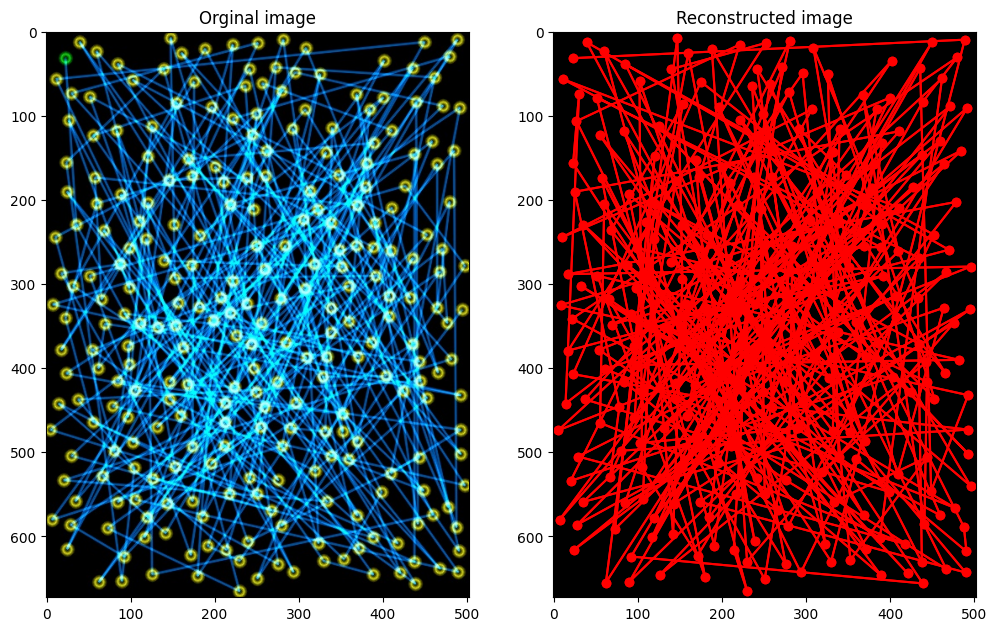

In [18]:
best_path = [all_positions[i] for i in permutation]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')

In [19]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(best_path)):
    lenght += np.linalg.norm(np.array(best_path[i]) - np.array(best_path[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  83110
Lenght of the path:  90903.30248885659


In [16]:
best_path_order = get_best_path(matr)
print(best_path_order)

0.011000000000000001
0.012100000000000001
0.013310000000000002
0.014641000000000003
0.016105100000000004
0.017715610000000007
0.019487171000000008
0.021435888100000012
0.023579476910000015
0.025937424601000018
0.02853116706110002
0.031384283767210024
0.03452271214393103
0.03797498335832414
0.04177248169415655
0.04594972986357221
0.050544702849929436
0.05559917313492239
0.06115909044841463
0.0672749994932561
0.07400249944258172
0.0814027493868399
0.0895430243255239
0.09849732675807629
0.10834705943388392
0.11918176537727232
0.13109994191499957
0.14420993610649954
0.1586309297171495
0.17449402268886446
0.19194342495775094
0.21113776745352605
0.23225154419887867
0.25547669861876654
0.2810243684806432
0.30912680532870757
0.34003948586157834
0.3740434344477362
0.41144777789250986
0.4525925556817609
0.497851811249937
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\freyt\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\freyt\AppData\Local\Temp\ipykernel_2060\2697666015.py", line 1, in <module>
    best_path_order = get_best_path(matr)
  File "C:\Users\freyt\AppData\Local\Temp\ipykernel_2060\1251430354.py", line 22, in get_best_path
    paths = return_paths(connection_matrix, simple_score, [0], 0)
  File "C:\Users\freyt\AppData\Local\Temp\ipykernel_2060\1251430354.py", line 14, in return_paths
    paths.extend(return_paths(connection_matrix, max_value, new_path, new_score))
  File "C:\Users\freyt\AppData\Local\Temp\ipykernel_2060\1251430354.py", line 14, in return_paths
    paths.extend(return_paths(connection_matrix, max_value, new_path, new_score))
  File "C:\Users\freyt\AppData\Local\Temp\ipykernel_2060\1251430354.py", line 14, in return_paths
    paths.extend(return_p

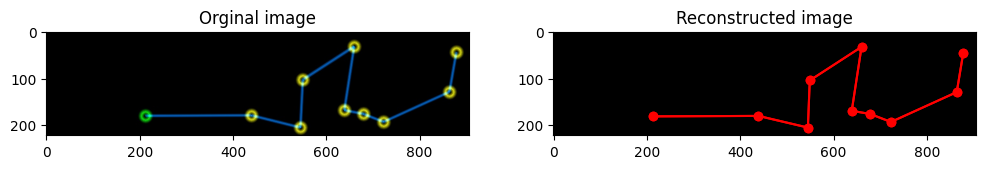

In [ ]:
best_path = [all_positions[i] for i in best_path_order]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')

In [ ]:
#new try using the best path always.
#once we arrive at a point where the taken path is not in the original N best baths,
#we go back check where we want to go next, see where this point was taken, go back there and take the next best path
#continue from there somehow make shure it doesnt loop

In [ ]:
part = matr[row]
idx = np.argpartition(part, 4)


def get_simple_best_path(connection_matrix):
    matr = connection_matrix.copy()
    best_path = [0]
    best_score = 0
    for i in range(connection_matrix.shape[0]-1):
        next_pos = np.argmin(matr[best_path[-1]])
        best_path.append(next_pos)
        best_score += connection_matrix[best_path[-2]][best_path[-1]]
        matr[:,best_path[-2]] = np.inf
        matr[best_path[-2],:] = np.inf
        
    return best_path, best_score

In [ ]:
def test_path(connection_matrix, path, K):
    while len(path) < connection_matrix.shape[0]:
        next_score = np.inf
        for i in range(connection_matrix.shape[0]):
            if i not in path:
                if connection_matrix[path[-1]][i] < next_score:
                    next_score = connection_matrix[path[-1]][i]
                    next_pos = i
        if next_pos not in np.argpartition(connection_matrix[path[-1]], K)[:K]:
            return False, np.argpartition(connection_matrix[path[-1]], K)[:K]
        path.append(next_pos)

    return True, path


In [ ]:
N = 4

path = []

while not path:
    pass
    #test_path
    #if success yay
    #else revert path and append path not in returned paths
    #test again